In [2]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [3]:
#print(response.text)

In [4]:
# To parse our HTML document and extract the 50 div containers, we’ll use a Python module 
# called BeautifulSoup,

In [5]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [6]:
# Before extracting the 50 div containers, we need to figure out what distinguishes them 
# from other div elements on that page. Often, the distinctive mark resides in the class 
# attribute. If you inspect the HTML lines of the containers of interest, you’ll notice 
# that the class attribute has two values: lister-item and mode-advanced. This combination
# is unique to these div containers. We can see that’s true by doing a quick search 
# (Ctrl + F). We have 50 such containers, so we expect to see only 50 matches:

In [7]:
# Now let’s use the find_all() method to extract all the div containers that have a class 
# attribute of lister-item mode-advanced:

In [8]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [9]:
# find_all() returned a ResultSet object which is a list containing all the 50 divs we 
# are interested in.

In [10]:
# Now we’ll select only the first container, and extract, by turn, each item of interest:

# The name of the movie.
# The year of release.
# The IMDB rating.
# The Metascore.
# The number of votes.

In [11]:
# Extracting the data for a single movie
# We can access the first container, which contains information about a single movie, by 
# using list notation on movie_containers.

In [12]:
# As you can see, the HTML content of one container is very long. To find out the HTML 
# line specific to each data point, we’ll use DevTools once again.

In [13]:
## The name of the movie
# We begin with the movie’s name, and locate its correspondent HTML line by using DevTools
# You can see that the name is contained within an anchor tag (<a>). This tag is nested 
# within a header tag (<h3>). The <h3> tag is nested within a <div> tag. This <div> is the
# third of the divs nested in the container of the first movie. We stored the content of 
# this container in the first_movie variable.

In [14]:
first_movie = html_soup.find('div', class_ = 'lister-item mode-advanced')

In [15]:
# first_movie is a Tag object, and the various HTML tags within it are stored as its 
# attributes. We can access them just like we would access any attribute of a Python 
# object. However, using a tag name as an attribute will only select the first tag by that
# name. If we run first_movie.div, we only get the content of the first div tag:

In [16]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [17]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [18]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [19]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

In [20]:
# Now it’s all just a matter of accessing the text from within that <a> tag:
first_name = first_movie.h3.a.text
first_name

'Logan'

In [21]:
# The year of the movie’s release
# We move on with extracting the year. This data is stored within the <span> tag below 
# the <a> that contains the name.

In [22]:
# Dot notation will only access the first span element. We’ll search by the distinctive 
# mark of the second <span>. We’ll use the find() method which is almost the same as 
# find_all(), except that it only returns the first match. In fact, find() is equivalent 
# to find_all(limit = 1). The limit argument limits the output to the first match.
# The distinguishing mark consists of the values lister-item-year text-muted unbold 
# assigned to the class attribute. So we look for the first <span> with these values 
# within the <h3> tag:

In [23]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [24]:
# From here, we just access the text using attribute notation:
first_year = first_year.text
first_year

'(2017)'

In [25]:
# We could easily clean that output and convert it to an integer. But if you explore more 
# pages, you will notice that for some movies the year takes unpredictable values like 
# (2017)(I) or (2015)(V). It’s more efficient to do the cleaning after the scraping, when 
# we’ll know all the year values.

In [26]:
# The IMDB rating
# We now focus on extracting the IMDB rating of the first movie.
# There are a couple of ways to do that, but we’ll first try the easiest one. If you 
# inspect the IMDB rating using DevTools, you’ll notice that the rating is contained 
# within a <strong> tag.

In [27]:
first_movie.strong

<strong>8.1</strong>

In [28]:
# Great! We’ll access the text, convert it to the float type, and assign it to the 
# variable first_imdb:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [29]:
# The Metascore
# If we inspect the Metascore using DevTools, we’ll notice that we can find it within a 
# span tag.

In [30]:
# Attribute notation clearly isn’t a solution. There are many <span> tags before that. 
# You can see one right above the <strong> tag. We’d better use the distinctive values of 
# the class attribute (metascore favorable).

In [31]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [32]:
# The favorable value indicates a high Metascore and sets the rating’s background color to
# green. The other two possible values are unfavorable and mixed. What is specific to all 
# Metascore ratings though is only the metascore value. This is the one we are going to 
# use when we’ll write the script for the entire page.

In [33]:
# The favorable value indicates a high Metascore and sets the rating’s background color to
# green. The other two possible values are unfavorable and mixed. What is specific to all 
# Metascore ratings though is only the metascore value. This is the one we are going to 
# use when we’ll write the script for the entire page.

In [34]:
# The name attribute is different from the class attribute. Using BeautifulSoup we can 
# access elements by any attribute. The find() and find_all() functions have a parameter 
# named attrs. To this we can pass in the attributes and values we are searching for as a 
# dictionary:

In [35]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="600394" name="nv">600,394</span>

In [36]:
# We could use .text notation to access the <span> tag’s content. It would be better 
# though if we accessed the value of the data-value attribute. This way we can convert the 
# extracted datapoint to an int without having to strip a comma. You can treat a Tag 
# object just like a dictionary. The HTML attributes are the dictionary’s keys. The values
# of the HTML attributes are the values of the dictionary’s keys. This is how we can 
# access the value of the data-value attribute:

In [37]:
first_votes['data-value']

'600394'

In [38]:
# Let’s convert that value to an integer, and assign it to first_votes:
first_votes = int(first_votes['data-value'])

In [39]:
# The script for a single page
# Before piecing together what we’ve done so far, we have to make sure that we’ll extract 
# the data only from the containers that have a Metascore.

In [40]:
# Before piecing together what we’ve done so far, we have to make sure that we’ll 
# extract the data only from the containers that have a Metascore. We need to 
# add a condition to skip movies without a Metascore.

In [41]:
# Using DevTools again, we see that the Metascore section is contained within a <div> tag.
# The class attribute has two values: inline-block and ratings-metascore. The distinctive 
# one is clearly ratings-metascore.

In [42]:
# We can use find() to search each movie container for a div having that distinct mark.
# When find() doesn’t find anything, it returns a None object. We can use this result in 
# an if statement to control whether a movie is scraped.

In [43]:
# Let’s look on the web page to search for a movie container that doesn’t have a Metascore
# , and see what find() returns.

In [44]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
eighth_movie_mscore

<div class="inline-block ratings-metascore">
<span class="metascore favorable">84        </span>
        Metascore
            </div>

In [45]:
# let’s put together the code above, and compress it as much as possible, but only 
# insofar as it’s still easily readable. In the next code block we:

In [46]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        # The name
        name = container.h3.a.text
        names.append(name)
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [47]:
# Let’s check the data collected so far. Pandas makes it easy for us to see whether we’ve 
# scraped our data successfully.

In [48]:
import pandas as pd

test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
movie        43 non-null object
year         43 non-null object
imdb         43 non-null float64
metascore    43 non-null int64
votes        43 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,600394
1,Thor: Ragnarok,(2017),7.9,74,534221
2,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,85,525114
3,Guardians of the Galaxy Vol. 2,(2017),7.6,67,524773
4,Wonder Woman,(2017),7.4,76,517552
5,Dunkirk,(2017),7.9,94,501843
6,Spider-Man: Homecoming,(2017),7.4,73,472005
7,Get Out,(I) (2017),7.7,84,444365
8,It,(I) (2017),7.3,69,421464
9,Blade Runner 2049,(2017),8.0,81,414046


In [49]:
# As a side note, if you run the code from a country where English is not the main 
# language, it’s very likely that you’ll get some of the movie names translated into the 
# main language of that country.

# Most likely, this happens because the server infers your location from your IP address. 
# Even if you are located in a country where English is the main language, you may still 
# get translated content. This may happen if you’re using a VPN while you’re making the 
# GET requests.

# If you run into this issue, pass the following values to the headers parameter of the 
# get() function:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [50]:
## The script for multiple pages

In [51]:
# We’ll scrape the first 4 pages of each year in the interval 2000-2017. 4 pages for each 
# of the 18 years makes for a total of 72 pages. Each page has 50 movies, so we’ll scrape 
# data for 3600 movies at most. But not all the movies have a Metascore, so the number 
# will be lower than that. Even so, we are still very likely to get data for over 2000 
# movies.

In [52]:
# As we are making the requests, we’ll only have to vary the values of only two parameters
# of the URL: the release_date parameter, and page. Let’s prepare the values we’ll need 
# for the forthcoming loop. In the next code cell we will:

# Create a list called pages, and populate it with the strings corresponding to the first 
# 4 pages.

# Create a list called years_url and populate it with the strings corresponding to the 
# years 2000-2017.

In [53]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [54]:
## Controlling the crawl-rate

In [55]:
# Controlling the rate of crawling is beneficial for us, and for the website we are 
# scraping. If we avoid hammering the server with tens of requests per second, then we are
# much less likely to get our IP address banned. We also avoid disrupting the activity of 
# the website we scrape by allowing the server to respond to other users’ requests too.

In [56]:
# We’ll control the loop’s rate by using the sleep() function from Python’s time module. 
# sleep() will pause the execution of the loop for a specified amount of seconds.

# To mimic human behavior, we’ll vary the amount of waiting time between requests by using
# the randint() function from the Python’s random module. randint() randomly generates 
# integers within a specified interval.

In [57]:
# e.g
from time import sleep
from random import randint

for _ in range(1,4):
    print('Jesus is Lord')
    sleep(randint(1,5))

Jesus is Lord
Jesus is Lord
Jesus is Lord


In [58]:
## Monitoring the loop as it’s still going

In [59]:
# Given that we’re scraping 72 pages, it would be nice if we could find a way to monitor 
# the scraping process as it’s still going. This feature is definitely optional, but it 
# can be very helpful in the testing and debugging process. Also, the greater the number 
# of pages, the more helpful the monitoring becomes. If you are going to scrape hundreds 
# or thousands of web pages in a single code run, I would say that this feature becomes a 
# must.

In [60]:
# For our script, we’ll make use of this feature, and monitor the following parameters:

# The frequency (speed) of requests, so we make sure our program is not overloading the 
# server.

# The number of requests, so we can halt the loop in case the number of expected requests 
# is exceeded.

# The status code of our requests, so we make sure the server is sending back the proper 
# responses.

In [61]:
# To get a frequency value we’ll divide the number of requests by the time elapsed since 
# the first request. This is similar to computing the speed of a car – we divide the 
# distance by the time taken to cover that distance. Let’s experiment with this monitoring
# technique at a small scale first. In the following code cell we will:

In [62]:
# Set a starting time using the time() function from the time module, and assign the 
# value to start_time.

# Assign 0 to the variable requests which we’ll use to count the number of requests.
# Start a loop, and then with each iteration:
    # Simulate a request.
    # Increment the number of requests by 1.
    # Pause the loop for a time interval between 8 and 15 seconds.
    # Calculate the elapsed time since the first request, and assign the value to 
    # elapsed_time.
    # Print the number of requests and the frequency.

In [63]:
from time import time

start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.3250773494707994 requests/s
Request: 2; Frequency: 0.49050889064789316 requests/s
Request: 3; Frequency: 0.4235668122999842 requests/s
Request: 4; Frequency: 0.44014569193634984 requests/s
Request: 5; Frequency: 0.4953754724711551 requests/s


In [64]:
# Since we’re going to make 72 requests, our work will look a bit untidy as the output 
# accumulates. To avoid that, we’ll clear the output after each iteration, and replace it 
# with information about the most recent request. To do that we’ll use the clear_output()
# function from the IPython’s core.display module. We’ll set the wait parameter of 
# clear_output() to True to wait with replacing the current output until some new output 
# appears.

In [65]:
from IPython.core.display import clear_output

start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 1; Frequency: 0.33324490350621483 requests/s
Request: 2; Frequency: 0.3329918442759088 requests/s
Request: 3; Frequency: 0.33305423777094395 requests/s
Request: 4; Frequency: 0.3996539346872829 requests/s
Request: 5; Frequency: 0.41629823866004007 requests/s


In [66]:
# To monitor the status code we’ll set the program to warn us if there’s something off. 
# A successful request is indicated by a status code of 200. We’ll use the warn() function
# from the warnings module to throw a warning if the status code is not 200.

In [67]:
from warnings import warn
warn("Warning Simulation")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [68]:
# We chose a warning over breaking the loop because there’s a good possibility we’ll 
# scrape enough data, even if some of the requests fail. We will only break the loop if 
# the number of requests is greater than expected.

In [69]:
### Piecing everything together

In [70]:
# Now let’s piece together everything we’ve done so far! In the following code cell, 
    # we start by:

# Redeclaring the lists variables so they become empty again.
# Preparing the monitoring of the loop.
# Then, we’ll:

# Loop through the years_url list to vary the release_date parameter of the URL.
# For each element in years_url, loop through the pages list to vary the page parameter
    # of the URL.
# Make the GET requests within the pages loop (and give the headers parameter the right 
    # value to make sure we get only English content).
# Pause the loop for a time interval between 8 and 15 seconds.
# Monitor each request as discussed before.
# Throw a warning for non-200 status codes.
# Break the loop if the number of requests is greater than expected.
# Convert the response‘s HTML content to a BeautifulSoup object.
# Extract all movie containers from this BeautifulSoup object.
# Loop through all these containers.
# Extract the data if a container has a Metascore.

In [72]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.06985100830839899 requests/s


In [73]:
# Examining the scraped data

#In the next code block we:

# Merge the data into a pandas DataFrame.
# Print some informations about the newly created DataFrame.
# Show the first 10 entries.

In [74]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 5 columns):
movie        3280 non-null object
year         3280 non-null object
imdb         3280 non-null float64
metascore    3280 non-null int64
votes        3280 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.2+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1266163
1,Memento,(2000),8.4,80,1065952
2,Snatch,(2000),8.3,55,744568
3,Requiem for a Dream,(2000),8.3,68,726376
4,X-Men,(2000),7.4,64,551240
5,Cast Away,(2000),7.8,73,491499
6,American Psycho,(2000),7.6,64,453725
7,Unbreakable,(2000),7.3,62,370358
8,Mission: Impossible II,(2000),6.1,59,300139
9,Meet the Parents,(2000),7.0,73,299747


In [75]:
# The output of info() shows we collected data for well over 2000 movies. We can also see 
# that there are no null values in our dataset whatsoever.

In [76]:
## Cleaning the scraped data

# We’ll clean the scraped data with two goals in mind: plotting the distribution of IMDB 
# and Metascore ratings, and sharing the dataset. Consequently, our data cleaning will 
# consist of:

# Reordering the columns.
# Cleaning the year column and convert the values to integers.
# Checking the extreme rating values to determine if all the ratings are within the 
    # expected intervals.
# Normalizing one of the ratings type (or both) for generating a comparative histogram.
# Let’s start by reordering the columns:

In [77]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1266163
1,Memento,(2000),8.4,80,1065952
2,Snatch,(2000),8.3,55,744568
3,Requiem for a Dream,(2000),8.3,68,726376
4,X-Men,(2000),7.4,64,551240


In [78]:
# Now let’s convert all the values in the year column to integers.

# Right now all the values are of the object type. To avoid ValueErrors upon conversion, 
# we want the values to be composed only from numbers from 0 to 9.

# Let’s examine the unique values of the year column. This helps us to get an idea of what
# we could do to make the conversions we want. To see all the unique values, we’ll use the
# unique() method:

In [79]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [80]:
# Counting from the end toward beginning, we can see that the years are always located 
# from the fifth character to the second. We’ll use the .str() method to select only that 
# interval. We’ll also convert the result to an integer using the astype() method:

In [81]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [82]:
# Let’s visualize the first 3 values of the year column for a quick check. We can also see
# the type of the values on the last line of the output:

In [83]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int64

In [84]:
# Now we’ll check the minimum and maximum values of each type of rating. We can do this 
# very quickly by using pandas’ describe() method. When applied on a DataFrame, this 
# method returns various descriptive statistics for each numerical column of the DataFrame.
# In the next line of code we select only those rows that describe the minimum and maximum
# values, and only those columns which describe IMDB ratings and Metascores.

In [85]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [86]:
# From the values above, you can see that the two ratings have different scales. To be 
# able to plot the two distributions on a single graph, we’ll have to bring them to the 
# same scale. Let’s normalize the imdb column to a 100-points scale.

# We’ll multiply each IMDB rating by 10, and then we’ll do a quick check by looking at the 
# first 3 rows:

In [87]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1266163,85.0
1,Memento,2000,8.4,80,1065952,84.0
2,Snatch,2000,8.3,55,744568,83.0


In [88]:
# So let’s save it:
movie_ratings.to_csv('movie_ratings.csv')

In [89]:
# As a side note, I strongly recommend saving the scraped dataset before exiting 
# (or restarting) your notebook kernel. This way you will only have to import the dataset 
# when you resume working, and don’t have to run the scraping script again. This becomes 
# extremely useful if you scrape hundreds or thousands of web pages.

# Finally, let’s plot the distributions!

In [90]:
# Plotting and analyzing the distributions
# In the following code cell we:

# Import the matplotlib.pyplot submodule.
# Run the Jupyter magic %matplotlib to activate Jupyter’s matplotlib mode and add inline 
    # to have our graphs displayed inside the notebook.
# Create a figure object with 3 axes.
# Plot the distribution of each unnormalized rating on an individual ax.
# Plot the normalized distributions of the two ratings on the same ax.
# Hide the top and right spines of all the three axes.

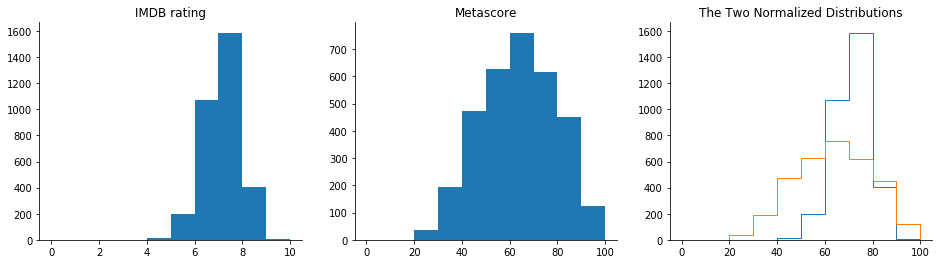

In [92]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')

#ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.show()

In [93]:
#Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There
#are few movies with a rating greater than 8, and even fewer with a rating smaller than 4.
#This indicates that both very good movies and very bad movies are rarer.

#The distribution of Metascore ratings resembles a normal distribution – most ratings are 
#average, peaking at the value of approximately 50. From this peak, the frequencies 
#gradually decrease toward extreme rating values. According to this distribution, there 
#are indeed fewer very good and very bad movies, but not that few as the IMDB ratings 
#indicate.

#On the comparative graph, it’s clearer that the IMDB distribution is highly skewed toward
#the higher part of the average ratings, while the Metascore ratings seem to have a much 
#more balanced distribution.

#What might be the reason for that skew in the IMDB distribution? One hypothesis is that 
#many users tend to have a binary method of assessing movies. If they like the movie, 
#they give it a 10. If they don’t like the movie, they give it a very small rating, or 
#they don’t bother to rate the movie. This an interesting problem that’s worth being 
#explored in more detail.